train_set size:  (60000, 28, 28)
test_set size:  (10000, 28, 28)


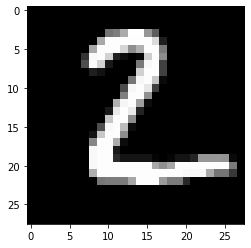

In [2]:
import torch
import torch.nn as nn
import torchvision as tv
import numpy as np
import matplotlib.pyplot as plt

train_data = tv.datasets.MNIST(
    root='./mnist',
    train=True,
    transform=tv.transforms.ToTensor(), 
    #把灰階從0~255壓縮到0~1
    download=False
)

test_data = tv.datasets.MNIST(
    root='./mnist',
    train=False,
    transform=tv.transforms.ToTensor(), 
    #把灰階從0~255壓縮到0~1
    download=False
)

data = train_data.data.numpy()
print('train_set size: ',data.shape)
data = test_data.data.numpy()
print('test_set size: ',data.shape)

plt.imshow(data[1],cmap='gray')
plt.show()

In [3]:
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encode = nn.Sequential(
            nn.Linear(28*28, 256),
            nn.Tanh(),
            nn.Linear(256, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
            nn.Tanh(),
            nn.Linear(64, 2),
            nn.Tanh(),
        )
        
        
        self.decode = nn.Sequential(
            nn.Linear(2, 64),
            nn.Tanh(),
            nn.Linear(64, 128),
            nn.Tanh(),
            nn.Linear(128, 256),
            nn.Tanh(),
            nn.Linear(256, 784),
            nn.Sigmoid()
        )
        
        
        
    def forward(self, x):
        code = self.encode(x)
        remake = self.decode(code)
        return remake
    
ac = autoencoder()

In [5]:
batch_size = 64
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size = batch_size, shuffle = False)


optimizer = torch.optim.Adam(ac.parameters(),lr=1e-3)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[10,40], gamma=0.5)
loss_fun = nn.MSELoss()

In [6]:
EPOCH = 10
LOSS = []
for epoch in range(EPOCH):
    running_loss = 0.0
    for step, batch in enumerate(train_loader, 0):
        data, label = batch
        optimizer.zero_grad()

        inputs = data.view(-1, 28*28)
        remake = ac(inputs)
        
        loss = loss_fun(remake, inputs)
        LOSS.append(loss.item())
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    mean_loss = running_loss/len(train_loader.dataset)
    scheduler.step()
#     if epoch % 5 ==0:
    print('[{}/{}] Loss:'.format(epoch+1, EPOCH), mean_loss)

print('Finish Training')


[1/10] Loss: 0.0009893817557642857
[2/10] Loss: 0.0007947236182789007
[3/10] Loss: 0.0006965838523581624
[4/10] Loss: 0.0006577990340689818
[5/10] Loss: 0.0006373992735520005
[6/10] Loss: 0.0006215919051940242
[7/10] Loss: 0.0006120091799646616
[8/10] Loss: 0.0006043222182119886
[9/10] Loss: 0.0005945521962518493
[10/10] Loss: 0.0005980979357535641
Finish Training


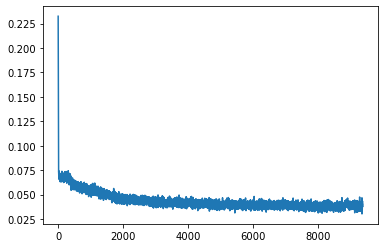

In [7]:
plt.plot(LOSS)

Original Images


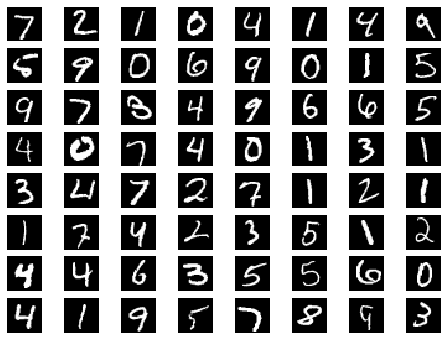

Restructured Image by AE


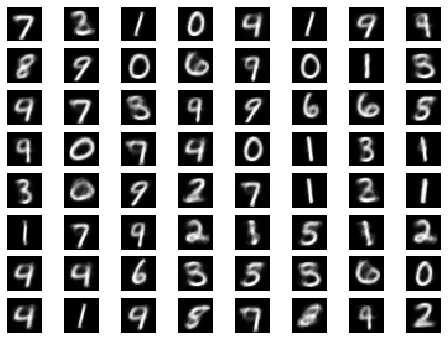

In [9]:
# Show images
def show_images(images):
    sqrtn = int(np.ceil(np.sqrt(images.shape[0])))
    for index, image in enumerate(images):
        plt.subplot(sqrtn, sqrtn, index+1)
        plt.imshow(image.reshape(28, 28))
        plt.axis('off')

plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

with torch.no_grad():
    dataiter = iter(test_loader)

    images, labels = dataiter.next()
    inputs = images.view(-1, 28*28)
    print('Original Images')
    show_images(inputs)
    plt.show()
    
    # Forward
    outputs = ac(inputs)
    print('Restructured Image by AE')
    show_images(outputs)
    plt.show()


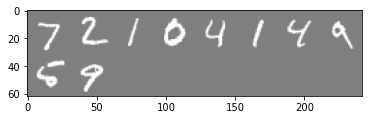

tensor([4, 4, 9, 4, 4, 9, 4, 4, 9, 4])


In [43]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


dataiter = iter(test_loader)
images, labels = dataiter.next()

outputs = ec(images)
_,predict = torch.max(outputs, 1)
# print images
imshow(tv.utils.make_grid(images))
print(predict)

In [200]:
score = 0
total = 0
with torch.no_grad():
    for step, data in enumerate(test_loader):
        inputs, label = data
        outputs = ec(inputs)
        _, predict = torch.max(outputs,1)
        total += label.size(0)
        
        score += (predict==label).sum().item()
print(score/total)

0.9849
